In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [84]:
titanic_csv = '../DATA/titanic_train.csv'
titanic = pd.read_csv('C:/Users/Perrine Mignot/Downloads/titanic.csv')

Exploring data

In [85]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

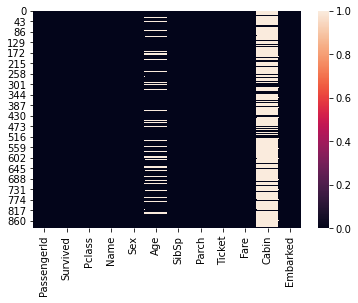

In [87]:
sns.heatmap(titanic.isnull())

AttributeError: module 'seaborn' has no attribute 'xlabel'

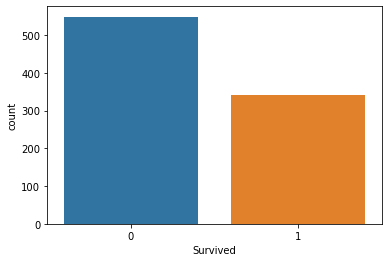

In [88]:
sns.countplot(x='Survived',data=titanic)
sns.xlabel('survived','died')

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

In [ ]:
# more females survived than males.

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [89]:
# passengers belonging to class 3 died the most.

Data Cleaning

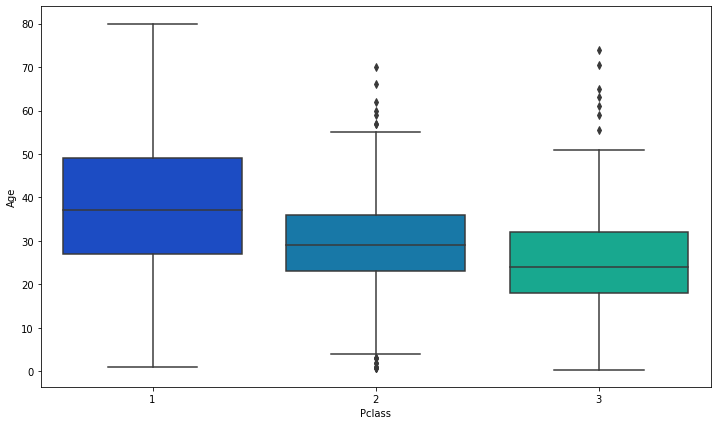

In [90]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [91]:
# wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to impute based on Pclass for Age.

In [92]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
# replace missing age value with mean

In [94]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(np.array(titanic['Age']).reshape(-1,1))
#imp_mean.fit_transform(titanic.Age))
print(imp_mean.transform(np.array(titanic.Age).reshape(-1,1)))

[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]
 [ 4.        ]
 [58.        ]
 [20.        ]
 [39.        ]
 [14.        ]
 [55.        ]
 [ 2.        ]
 [29.69911765]
 [31.        ]
 [29.69911765]
 [35.        ]
 [34.        ]
 [15.        ]
 [28.        ]
 [ 8.        ]
 [38.        ]
 [29.69911765]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [40.        ]
 [29.69911765]
 [29.69911765]
 [66.        ]
 [28.        ]
 [42.        ]
 [29.69911765]
 [21.        ]
 [18.        ]
 [14.        ]
 [40.        ]
 [27.        ]
 [29.69911765]
 [ 3.        ]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [18.        ]
 [ 7.        ]
 [21.        ]
 [49.        ]
 [29.        ]
 [65.        ]
 [29.69911765]
 [21.        ]
 [28.5       ]
 [ 5.        ]
 [11.        ]
 [22.        ]
 [38.        ]
 [45.        ]
 [ 4.        ]
 [29.69911765]
 [29.69911765]
 [29.     

In [95]:
age_imputes = imp_mean.transform(np.array(titanic.Age).reshape(-1,1))
print(type(age_imputes))
print(age_imputes.shape)

<class 'numpy.ndarray'>
(891, 1)


In [96]:
titanic['Age']= age_imputes

In [97]:
titanic['Age'].isna().sum()

0

In [98]:
titanic.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [99]:
# replace age by pclass and sex mean values

In [100]:
titanic2 = titanic

In [101]:
by_sex_class = titanic2.groupby(['Sex','Pclass'])

In [102]:
titanic2.groupby(['Sex','Pclass'])['Age'].median()

Sex     Pclass
female  1         32.500000
        2         28.500000
        3         28.000000
male    1         36.000000
        2         29.699118
        3         29.699118
Name: Age, dtype: float64

In [103]:
def impute_median(series):
    return series.fillna(series.median())

In [104]:
titanic2.Age = by_sex_class.Age.transform(impute_median)

In [105]:
titanic2.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


In [106]:
titanic2.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [107]:
titanic2['Age'].isna().sum()

0

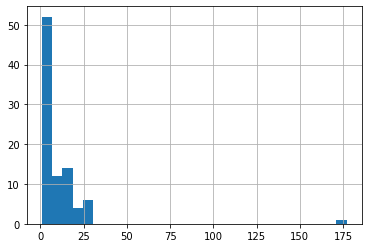

In [108]:
titanic2.Age.value_counts().hist(bins = 30)

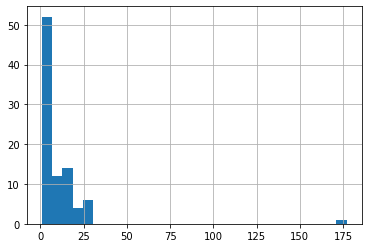

In [109]:
titanic.Age.value_counts().hist(bins = 30)

In [ ]:
# Why is the data replacing Age the same when we used 2 different functions to replace Age missing value? Is it because all the missing values are for man from class 2 or 3?

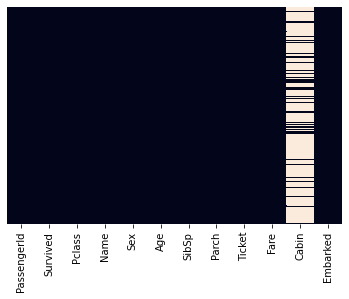

In [110]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

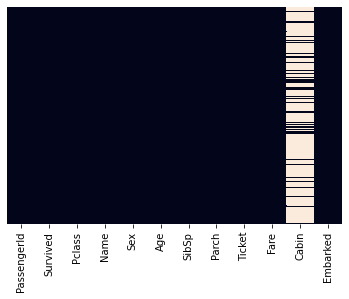

In [71]:
sns.heatmap(titanic2.isnull(),yticklabels=False,cbar=False)

In [72]:
# Great! Let’s go ahead and drop the Cabin column.

In [73]:
titanic.drop('Cabin',axis=1,inplace=True)

Converting Categorical Features

Here, we are dummying the sex and embark columns. After dummying, we will drop the rest of the columns which are not needed. (sex and embarked aren't needed as they are the original ones)

In [74]:
sex = pd.get_dummies(titanic['Sex'])
embark = pd.get_dummies(titanic['Embarked'])

In [75]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [76]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


We will concatenate the new sex and embarked columns to the dataframe.

In [86]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [87]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


Test Train Split

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), titanic['Survived'], test_size=0.30)                

Training and Predicting

In [89]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=5000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

Evaluation

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       159
           1       0.75      0.73      0.74       109

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [92]:
import statsmodels.api as sm

# Function to calculate VIF
def calculate_vif(data):
    vif_titanic = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_titanic.loc[i] = [x_var_names[i], vif]
    return vif_titanic.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=titanic.drop(['Survived'],axis=1)
calculate_vif(titanic)

,Var,Vif
11,S,90.87
9,C,69.66
10,Q,36.71
8,male,36.31
7,female,32.46
2,Pclass,2.02
1,Survived,1.67
6,Fare,1.65
3,Age,1.35
5,Parch,1.33


In [93]:
titanic.drop(['S','female'],axis=1,inplace=True)
X=titanic.drop(['Survived'],axis=1)
calculate_vif(titanic)

,Var,Vif
2,Pclass,6.01
3,Age,4.55
0,PassengerId,3.79
1,Survived,2.04
6,Fare,2.03
5,Parch,1.63
4,SibSp,1.58
8,C,1.37
9,Q,1.20
7,male,0.43
